In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk 
import sklearn.datasets as skd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics

Importing the house price dataset

<Axes: >

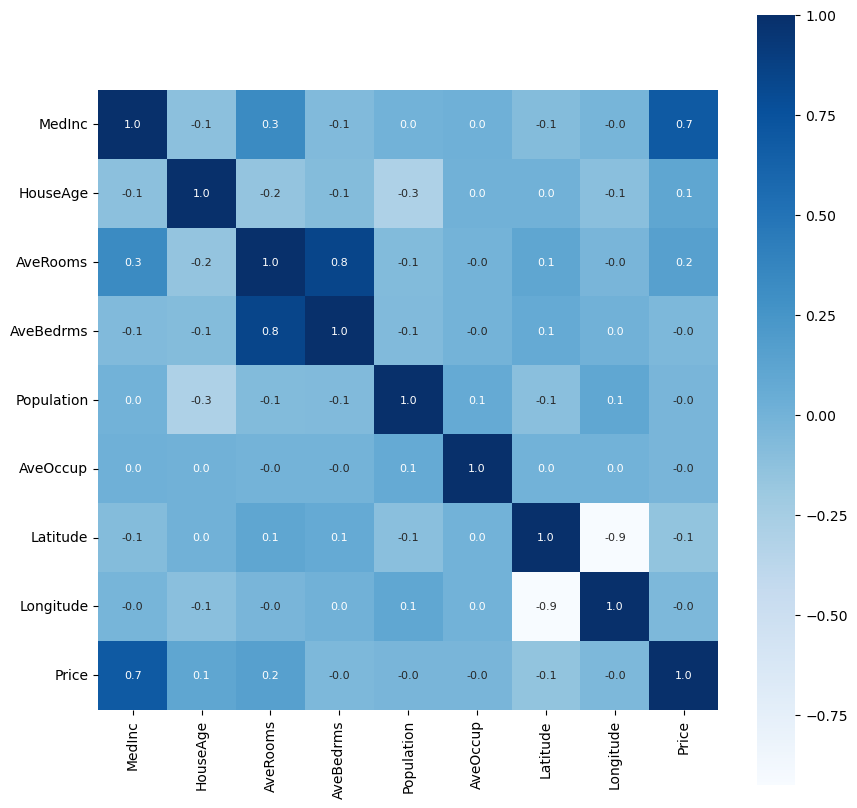

In [3]:
house_price_dataset=skd.fetch_california_housing()


# Loading the dataset to pandas dataframe 
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

#fetch five rows
house_price_dataframe.head()

#add the target price column to the dataframe
house_price_dataframe['Price']=house_price_dataset.target  

#checking the number of columns and rows in the dataframe 
house_price_dataframe.shape 

#check if there have any missing values 
house_price_dataframe.isnull().sum() 

#statistical measure of the dataset 
house_price_dataframe.describe() 

#Understanding the correlation between various features in the dataset 
#there have positive and negative correlation between features 

correlation=house_price_dataframe.corr() 

#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10)) 
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Blues")


Separate the data and the target 

In [8]:
X=house_price_dataframe.drop(['Price'],axis=1)
Y=house_price_dataframe['Price']

#spliting the data into test and train data 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# print(X_train.shape,X_test.shape)

#Model training 
#Using XGBoost Regressor 
#loading the model 
model=XGBRegressor() 

#training model with X train data set
model.fit(X_train,Y_train) 



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation the model 
- Prediction on training data

In [13]:
#accuracy for prediction on training data 
training_data_prediction=model.predict(X_train)

#R squared error 
score_1=metrics.r2_score(Y_train,training_data_prediction)

#Mean absolute error 
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

print(score_2)

0.1933648700612105


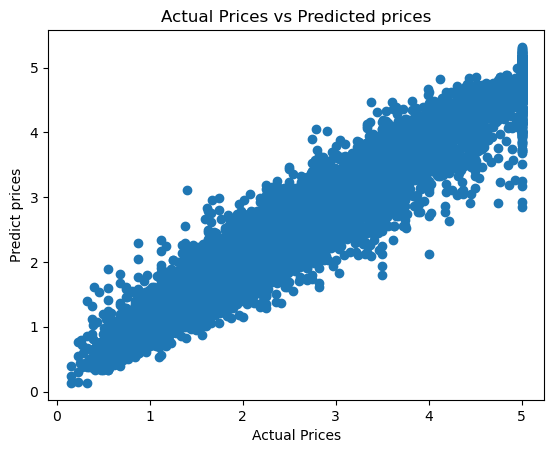

In [17]:
#Visualizing the actual prices and predicted prices 
plt.scatter(Y_train,training_data_prediction)

plt.xlabel("Actual Prices")
plt.ylabel("Predict prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

Prediction on test data

In [16]:
#accuracy for prediction on training data 
testing_data_prediction=model.predict(X_test)

#R squared error 
score_1=metrics.r2_score(Y_test,testing_data_prediction)

#Mean absolute error 
score_2=metrics.mean_absolute_error(Y_test,testing_data_prediction)

print(score_2)

0.3108631800268186
